Load in the `wine` data set, and create a binary classification problem with just two features (for plotting purposes).

This routine assumes that your directory contains the file `wine.data.txt`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# Load in wine data: 178 instances, 3 classes
#
data = np.loadtxt('wine.data.txt', delimiter=',')
ax = data[0:178,1:14]
ay = data[0:178,0]
#
# Now get indices of classes 1 and 2: total of 130 instances
# Let x,y be the data and labels for just those instances
#
I1 = (ay == 1)
I2 = (ay == 2)
I = I1 + I2
x = ax[I,:]
y = ay[I]
#
# Use just two features:
# Alcohol level (feature 0) and hue (feature 10)
#
features = (0,10)
x = x[:,features]

Now plot the points to see what they look like.

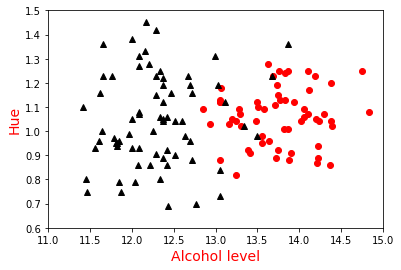

In [2]:
x_min, x_max = 11.0, 15.0
y_min, y_max = 0.6, 1.5
plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==2),0], x[(y==2),1], 'k^')
plt.xlabel('Alcohol level', fontsize=14, color='red')
plt.ylabel('Hue', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.yticks([0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])
plt.show()

Next, let's train a linear SVM. We'll just use default parameters.

In [3]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x,y)

SVC(kernel='linear')

Identify the support vectors so that they can be highlighted in the subsequent plot.


In [4]:
sv = np.zeros(130,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)

Now let's plot the decision boundary, along with the data points, drawing the support vectors slightly larger than the other points.

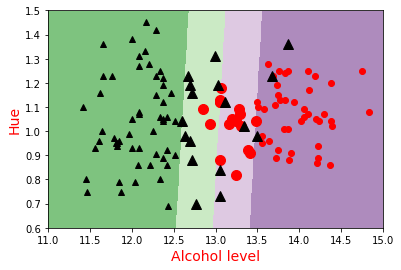

In [5]:
delta = 0.005
x_min, x_max = 11.0, 15.0
y_min, y_max = 0.6, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
plt.plot(x[(y==2)*notsv,0], x[(y==2)*notsv,1], 'k^')
plt.plot(x[(y==2)*sv,0], x[(y==2)*sv,1], 'k^', markersize=10)
plt.xlabel('Alcohol level', fontsize=14, color='red')
plt.ylabel('Hue', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.yticks([0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])
plt.show()

## Problem 7

In [6]:
#a
def classify(w, b, x):
    return np.sign(np.dot(w,x) + b)

In [7]:
def perceptron(data, labels):
    n = len(labels)
    inds = np.random.permutation(n)
    data = data[inds,:]
    labels = labels[inds]
    n_correct = 0
    w = np.zeros(np.shape(data)[1])
    b = 0
    while(n_correct < n):
        n_correct = 0
        for i in range(n):
            if (classify(w, b, data[i,:]) == labels[i]):
                n_correct += 1
            else:
                w = w + labels[i]*data[i,:]
                b = b + labels[i]
    return(w,b)

In [8]:
#b
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [9]:
features = x[:, (1,3)][:100]
labels = np.array(list(map(lambda x: -1 if x==0 else x, y[:100])))

In [10]:
#c
w,b = perceptron(features, labels) 

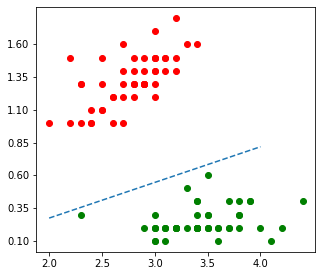

In [11]:
fig = plt.figure(figsize=(5,4.5))
ax = fig.gca()
ax.set_xticks(np.arange(min(features[:,0]), max(features[:,0]), 0.5))
ax.set_yticks(np.arange(min(features[:,1]), max(features[:,1]), 0.25))
for i,j in zip(features, labels):
    if j ==1:
        color = 'red'
    else:
        color = 'green'
    ax.scatter(i[0], i[1], color=color)   
ax.plot(np.arange(min(features[:,0]), max(features[:,0]), 0.5), np.arange(min(features[:,0]), max(features[:,0]), 0.5) *(-w[0]/w[1]) +(w[0]/w[1]), '--' )
plt.show()

In [12]:
#d
def perceptron(data, labels):
    n = len(labels)
    inds = np.random.permutation(n)
    data = data[inds,:]
    labels = labels[inds]
    n_correct = 0
    w = np.zeros(np.shape(data)[1])
    b = 0
    num = 0
    while(n_correct < n):
        n_correct = 0
        for i in range(n):
            if (classify(w, b, data[i,:]) == labels[i]):
                n_correct += 1
            else:
                w = w + labels[i]*data[i,:]
                b = b + labels[i]
                num+=1
    return(w,b), num

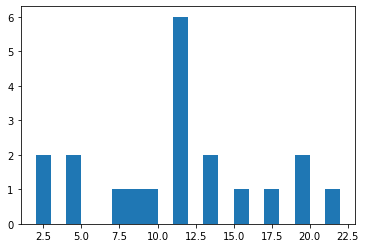

In [13]:
num_updates = []
for _ in range(20):
    _, num = perceptron(features, labels) 
    num_updates.append(num)
plt.hist(num_updates, bins=20)
plt.show()

### Problem 8

In [14]:
#a
features = x[:, (0,2)][50:]
labels = np.array(list(map(lambda x: -1 if x==2 else x, y[50:])))

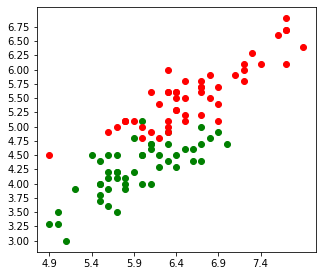

In [15]:
fig = plt.figure(figsize=(5,4.5))
ax = fig.gca()
ax.set_xticks(np.arange(min(features[:,0]), max(features[:,0]), 0.5))
ax.set_yticks(np.arange(min(features[:,1]), max(features[:,1]), 0.25))
for i,j in zip(features, labels):
    if j ==1:
        color = 'green'
    else:
        color = 'red'
    ax.scatter(i[0], i[1], color=color)   
plt.show()

In [16]:
#b
C_value = np.arange(1.5, 16, 1.5)
errors = []
num_vectors = []
for c in C_value:
    clf = SVC(kernel='linear', C=c)
    clf.fit(features,labels)
    predicted = clf.predict(features)
    error = 1 - sum(predicted == labels) / len(labels)
    num_vector = len(clf.support_)
    errors.append(error)
    num_vectors.append(num_vector)

In [17]:
C_value 

array([ 1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ])

In [18]:
errors

[0.06999999999999995,
 0.050000000000000044,
 0.06999999999999995,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.040000000000000036,
 0.050000000000000044,
 0.06999999999999995]

In [19]:
num_vectors

[27, 23, 21, 19, 19, 19, 18, 17, 16, 16]

In [20]:
#c
best_c = C_value[np.argmin(errors)]

In [21]:
clf = SVC(kernel='linear', C=best_c)
clf.fit(features,labels)

SVC(C=12.0, kernel='linear')

In [22]:
w = clf.coef_[0]
b = clf.intercept_[0]

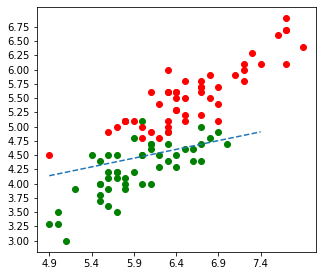

In [23]:
fig = plt.figure(figsize=(5,4.5))
ax = fig.gca()
ax.set_xticks(np.arange(min(features[:,0]), max(features[:,0]), 0.5))
ax.set_yticks(np.arange(min(features[:,1]), max(features[:,1]), 0.25))
for i,j in zip(features, labels):
    if j ==1:
        color = 'green'
    else:
        color = 'red'
    ax.scatter(i[0], i[1], color=color)   

ax.plot(np.arange(min(features[:,0]), max(features[:,0]), 0.5), np.arange(min(features[:,0]), max(features[:,0]), 0.5) *(-w[0]/w[1]) +(w[0]/w[1]) - b/w[1], '--' )
plt.show()

In [24]:
sv = np.zeros(150,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)